# Spotify top 200 charts (2020 - 2021)
### This data set includes all songs that have been on the top 200 Weekly (Gloal) from 2020 to 2021.

### The csv includes:
```
index, highest charting position, number of times charted, week of highest charting, song name, streams, artist, artist followers, song id, genre, release date, weeks charted, popularity, danceability, energy, loudness, speechiness, acousticness, liveness, tempo, duration, valence, chord
```

### For this visualization we're interested in:
- Geting a brief understanding of what genre was the most listened from 2020 to 2021.
- Getting a brief understanding of what mood whas the most lidened to from 2020 to 2021 knowing the global context of pandemig.
- Knowing which chords are the most used when composing a song and if it affects the charting place.
- Knowing if there's an "ideal" duration for a song to be top charted.
- Knowing if there's an "ideal" tempo for a song to be top charted.
- Knowing what's the mood for a song to be top or bottom charted.

### What will this help us for?
This will help us get an insight on what type of song is more likely to be top charted and therefore more listened according to the considered variables: "genre, duration, tempo and chord"

In [4]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import ast
from collections import Counter
import csv
import matplotlib.pyplot as plt
from matplotlib.textpath import TextPath
from wordcloud import WordCloud, STOPWORDS

def read_csv(csv_route):
  with open(csv_route, encoding = "cp850") as file:
    reader = csv.reader(file, delimiter=",")
    data_indices = [1, 4, 6, 9, 19, 20, 21, 22]
    float_indices = [0, 4, 5]
    header = next(reader)
    header = [header[i] for i in data_indices]
    data = []
    for row in reader:
      song = [row[i] for i in data_indices]
      data.append(song)
    for idx, song in enumerate(data):
      for i, val in enumerate(song):
        if val == " ":
          del data[idx]
        else: 
          if i in float_indices:
            song[i] = float(song[i])
    return data, header

def filter_data(data, upper_limit, lower_limit):
  return list(filter(lambda x: float(x[0]) <= upper_limit and float(x[0]) >= lower_limit, data))

def generate_chord_wordcloud(data):
  comment_words = " ".join(song[7] for song in data)
  wordcloud = WordCloud(width=400, height=400, background_color = "white", regexp=r"(?:[A-z]#/[A-z]{2})|(?:[A-Z])").generate(comment_words)
  return wordcloud

def generate_genre_wordcloud(data):
  genres = list([genre[3] for genre in data])
  all_genres = []

  for genre_list in genres:
    genre_list = ast.literal_eval(genre_list)
    for genre in genre_list:
      all_genres.append(genre)

  comment_words = " ".join(all_genres)
  wordcloud = WordCloud(width=400, height=400, background_color = "white").generate(comment_words)
  return wordcloud

def mood(value):
  if value >= 0.0 and value < 0.2:
    return "Depressing"
  elif value >= 0.2 and value < 0.4:
    return "Sad"
  elif value >= 0.4 and value < 0.6:
    return "Chill"
  elif value >= 0.6 and value < 0.8:
    return "Happy"
  else:
    return "Exciting"

### First let's read the dataset and retrieve all the songs that belonged to the top 10 charted and the ones that belonged to the least 10 charted. (best and worst)

In [6]:
dataset = pd.read_csv("./spotify_dataset.csv", ',')
dataset["Valence"].replace(" ", np.nan, inplace=True)
dataset.dropna(subset=["Valence"], inplace=True)
data, header = read_csv('./spotify_dataset.csv')
top_ten = filter_data(data, 10, 0)
last_ten = filter_data(data, 200, 190)
songs_valence = dataset[['Highest Charting Position', 'Valence']]
songs_valence = songs_valence.astype({"Highest Charting Position": "float", "Valence": "float"})


/tmp/ipykernel_29925/2682310340.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  dataset = pd.read_csv("./spotify_dataset.csv", ',')


### Let's find out the most listened genre's from 2020 to 2021

In [ ]:
fig, ax = plt.subplots(1,2)
fig.suptitle("Frequently listened genres in:")
ax[0].set_title("top charted songs")
ax[0].imshow(generate_genre_wordcloud(top_ten))
ax[0].axis("off")
ax[1].set_title("least charted songs")
ax[1].imshow(generate_genre_wordcloud(last_ten))
ax[1].axis("off")
fig.tight_layout()
plt.show()

### Let's see if there's an ideal duration for a song to be top charted

In [ ]:
duration_top_ten = list(zip([float(element[0]) for element in top_ten], [round(float(element[5]) / 60000, 2) for element in top_ten]))
duration_last_ten = list(zip([float(element[0]) for element in last_ten], [round(float(element[5]) / 60000, 2) for element in last_ten]))

fig, ax = plt.subplots(1, 2)
fig.suptitle("Frequently song duration for:")
ax[0].set_title("top charted songs")
ax[0].scatter([val[0] for val in duration_top_ten], [val[1] for val in duration_top_ten])
ax[1].set_title("least charted songs")
ax[1].scatter([val[0] for val in duration_last_ten], [val[1] for val in duration_last_ten])
fig.tight_layout()
plt.show()

tempo_top = np.array([round(float(element[5]) / 60000, 2) for element in top_ten])
tempo_last = np.array([round(float(element[5]) / 60000, 2) for element in last_ten])
print("Mean value for top charted: " + str(round(np.mean(tempo_top), 2)))
print("Mean value for least charted: " + str(round(np.mean(tempo_last), 2)))

### Let's see if there's an ideal tempo for a song to be top charted

In [ ]:
tempo_top_ten = list(zip([int(element[0]) for element in top_ten], [float(element[4]) for element in top_ten]))
tempo_last_ten = list(zip([int(element[0]) for element in last_ten], [float(element[4]) for element in last_ten]))

fig, ax = plt.subplots(1, 2)
fig.suptitle("Frequently song tempo for:")
ax[0].set_title("top charted songs")
ax[0].scatter([val[0] for val in tempo_top_ten], [val[1] for val in tempo_top_ten])
ax[1].set_title("least charted songs")
ax[1].scatter([val[0] for val in tempo_last_ten], [val[1] for val in tempo_last_ten])
fig.tight_layout()
plt.show()

tempo_top = np.array([float(element[4]) for element in top_ten])
tempo_last = np.array([float(element[4]) for element in last_ten])
print("Mean value for top charted: " + str(round(np.mean(tempo_top), 2)))
print("Mean value for least charted: " + str(round(np.mean(tempo_last), 2)))

### Now let's find out the frequently used chords for top charted and least charted songs

In [ ]:
fig, ax = plt.subplots(1,2)
fig.suptitle("Frequently used chords for:")
ax[0].set_title("top charted songs")
ax[0].imshow(generate_chord_wordcloud(top_ten))
ax[0].axis("off")

ax[1].set_title("least charted songs")
ax[1].imshow(generate_chord_wordcloud(last_ten))
ax[1].axis("off")
fig.tight_layout()
plt.show()

### Covid was a thing during these years so , did it really affected in the type of music listened?

In [ ]:
emotions_values = [float(val[6]) for val in data]
emotions_data = Counter([mood(emotion) for emotion in emotions_values])

fig, ax = plt.subplots(1, 2)
ax[0].hist(emotions_values)
ax[1].pie(emotions_data.values(), labels=emotions_data.keys(), autopct="%1.1f%%")
plt.show()

### For top and least charted?

In [ ]:
top_emotions_values = [float(val[6]) for val in top_ten]
top_emotions_data = Counter([mood(emotion) for emotion in top_emotions_values])

last_emotions_values = [float(val[6]) for val in last_ten]
last_emotions_data = Counter([mood(emotion) for emotion in last_emotions_values])

fig, ax = plt.subplots(1, 2)
fig.suptitle("Mood song frequency for: ")
ax[0].set_title("Top charted")
ax[0].pie(top_emotions_data.values(), labels=top_emotions_data.keys(), autopct="%1.1f%%")

ax[1].set_title("Last charted")
ax[1].pie(last_emotions_data.values(), labels=last_emotions_data.keys(), autopct="%1.1f%%")
plt.show()

Correlation: 0.04536176744635397
Coeficients: [[0.00017739]] [0.49912473]


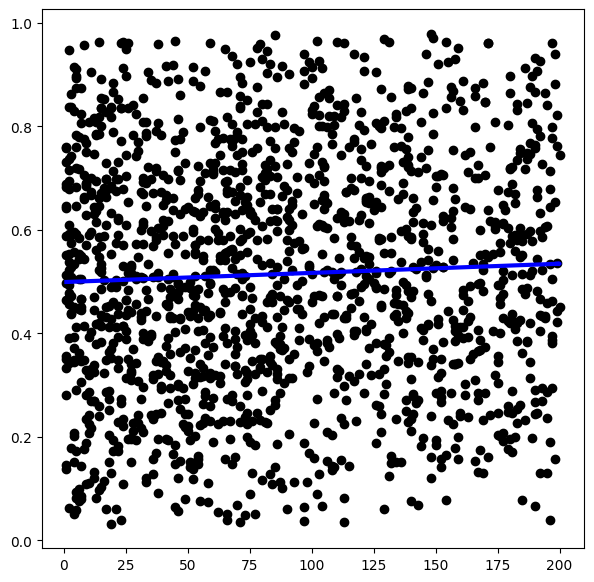

In [41]:
# ASSIGN X & Y VARIABLES
Y = songs_valence[["Valence"]]
X = songs_valence[["Highest Charting Position"]]


regr = linear_model.LinearRegression()
regr.fit(X, Y)

xval = X.values
yval = Y.values

print("Correlation: " + str(np.array(songs_valence.corr())[0,1]))
print("Coeficients: " + str(regr.coef_) + " "  +str(regr.intercept_))
# CREATE PLOT
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X,Y, color="black")
ax.plot(X, regr.predict(X), color="blue", linewidth=3)
plt.show()


### Insights